## Problem Statement

A new pharmaceutical startup is recently acquired by one of the world's largest MNCs. For the acquisition process, the startup is required to tabulate all drugs that they have sold and account for each drug's effectiveness. A dedicated team has been assigned the task to analyze all the data. This data has been collected over the years and it contains data points such as the drug's name, reviews by customers, popularity and use cases of the drug, and so on. Members of this team are by the noise present in the data. Your task is to make a sophisticated NLP-based Machine Learning model that has the mentioned features as the input. Also, use the input to predict the base score of a certain drug in a provided case.

The data folder consists of the following two .csv files:
 • train.csv - (32165x 7) 
 • test.csv - (10760x6)


## Approach

Before even peeking at the data, I segment the modeling process into the following parts:

1. Data Exploration
2. Data Preparation
3. Modeling

The next code block contains all the libraries we need to import for our use.

In [1]:
import pandas as pd
# to access and manipulate the medical data
import seaborn as sns 
# for data visualisation
import matplotlib.pyplot as plt
# for plotting graphs
import sklearn.preprocessing as ppr
# for label encoding
from sklearn.linear_model import LinearRegression
# for Linear Regression
import spacy
# for NLP purposes
import numpy as np
# numpy for manipulating arrays and matrices
from tensorflow import keras
from tensorflow.keras import layers
# tensorflow and keras API for training and testing the data 

2021-11-29 03:11:07.557217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-29 03:11:07.557279: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Data Exploration

I have been given the structure of the dataset with the problem statement. To explore its contents, I load up both the training and test data and load the first 10 entries.

In [2]:
data_train = pd.read_csv("train.csv")
data_train.head(10)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782
5,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,5.691792
6,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,9-Mar-17,54,8.563274
7,219869,Amitriptyline,ibromyalgia,"""I&#039;ve been taking amitriptyline since Jan...",9,15-Mar-17,39,7.301039
8,212077,Lamotrigine,Bipolar Disorde,"""I&#039;ve been on every medicine under the su...",10,9-Nov-14,18,6.633970
9,12372,Atripla,HIV Infection,"""Spring of 2008 I was hospitalized with pnuemo...",8,9-Jul-10,11,6.562116


In [3]:
train_rows = len(data_train.axes[0])
train_columns = len(data_train.axes[1])
print("The drug sales train database contains",train_rows,"entries, which have", train_columns,"columns. These are:")
list(data_train.columns)

The drug sales train database contains 32165 entries, which have 8 columns. These are:


['patient_id',
 'name_of_drug',
 'use_case_for_drug',
 'review_by_patient',
 'effectiveness_rating',
 'drug_approved_by_UIC',
 'number_of_times_prescribed',
 'base_score']

In [4]:
print("Similarly, the test database is shown below:")
data_test = pd.read_csv("test.csv")
data_test.head()

Similarly, the test database is shown below:


,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [5]:
test_rows = len(data_test.axes[0])
test_columns = len(data_test.axes[1])
print("The drug sales test database contains",test_rows,"entries, and has the base score dropped, which I will to model the train data on and predict.")


The drug sales test database contains 10760 entries, and has the base score dropped, which I will to model the train data on and predict.


## Attributes

Let us talk about each of the aspects one-by-one. The reader can skip this straight to the Data Cleaning subsection.

## Patient_ID

In [6]:
patient_id_train_min = data_train.patient_id.min()
patient_id_train_max = data_train.patient_id.max()
patient_id_test_min = data_test.patient_id.min()
patient_id_test_max = data_test.patient_id.max()

print("The patient ID ranges between", patient_id_train_min, 'and', patient_id_train_max, "in the training dataset. For the test dataset, it lies between", patient_id_test_min, "and", patient_id_test_max)

The patient ID ranges between 9 and 232289 in the training dataset. For the test dataset, it lies between 21 and 232253


In [7]:
patient_id_train = data_train['patient_id'].nunique()

patient_id_test = data_test['patient_id'].nunique()

print("The number of unique patients dealt with in the training data is", patient_id_train, "and in the test data is", patient_id_test)

unique_patient_count = len(set(data_train.patient_id).intersection(set(data_test.patient_id)))

print("The number of use cases that overlap with each other across the two sets is", unique_patient_count)

The number of unique patients dealt with in the training data is 32165 and in the test data is 10760
The number of use cases that overlap with each other across the two sets is 0


Our intuition tells us that the ID of a patient should not have any correlation with the score of the drug. This can also be seen in the plot below. The data becomes sparse as the base score becomes small, but across the span of the ID the spread is uniform. For modeling purposes, thus, we will drop the patient ID. This is also works because no patient ID is repeated in the database.


Text(0, 0.5, 'Base score')

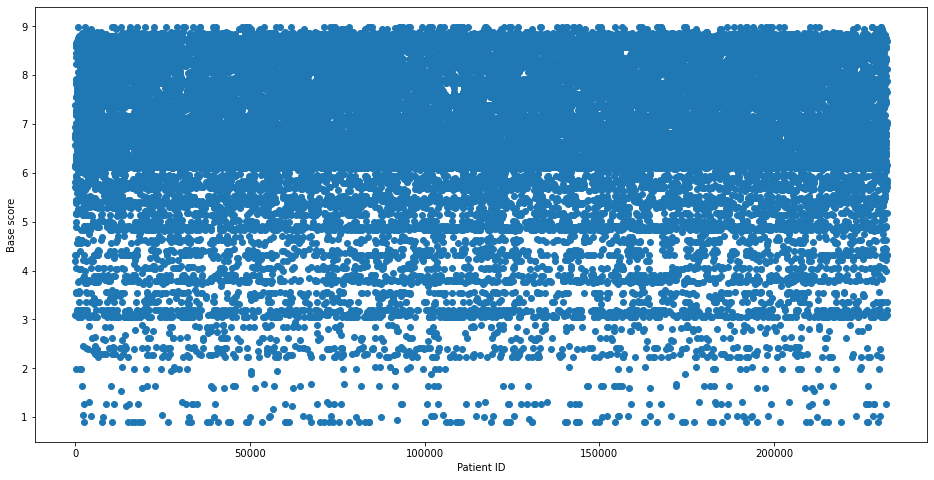

In [8]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.patient_id,data_train.base_score)
ax.set_xlabel('Patient ID')
ax.set_ylabel('Base score')

## Name of Drug


In [9]:
num_of_drugs_train = data_train['name_of_drug'].nunique()

num_of_drugs_test = data_test['name_of_drug'].nunique()

print("The number of unique drugs prescribed in the training data is", num_of_drugs_train, "and in the test data is", num_of_drugs_test)

unique_drug_count = len(set(data_train.name_of_drug).intersection(set(data_test.name_of_drug)))

print("The number of drug names that overlap with each other across the two sets is", unique_drug_count)

The number of unique drugs prescribed in the training data is 2220 and in the test data is 1478
The number of drug names that overlap with each other across the two sets is 1317


So there are around 161 drugs that are present in the test set but not in the training set. Clearly, this presents a dilemma as the drug used will have a direct effect on the base score (as seen in the plot below) and we shouldn't want to drop them. We will one-hot encode the combined dataset and use it to train the data and test. The one-hot encoding matrix will be 2220+161=2381 dimensional.

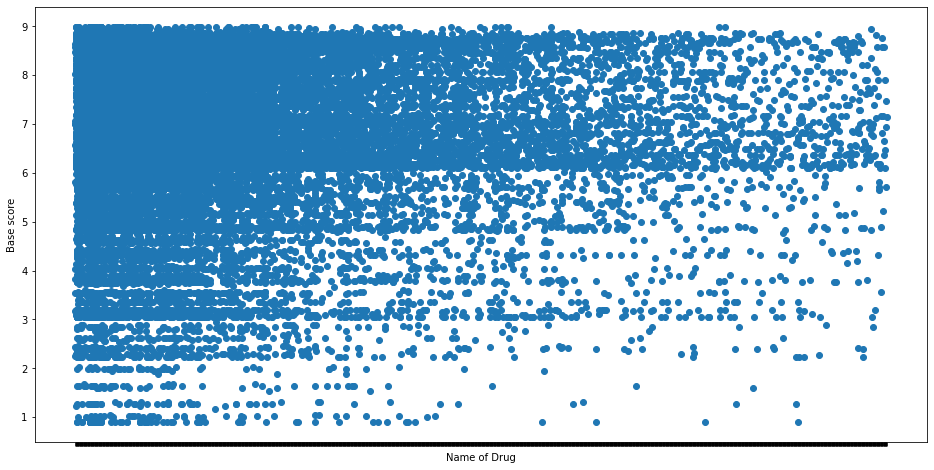

In [10]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.name_of_drug,data_train.base_score)
ax.set_xlabel('Name of Drug')
ax.set_ylabel('Base score')
ax.set_xticklabels([])
plt.show()

## Use Case of the Drug

In [11]:
num_of_usecase_train = data_train['use_case_for_drug'].nunique()

num_of_usecase_test = data_test['use_case_for_drug'].nunique()

print("The number of unique cases dealt with in the training data is", num_of_usecase_train, "and in the test data is", num_of_usecase_test)

unique_case_count = len(set(data_train.use_case_for_drug).intersection(set(data_test.use_case_for_drug)))

print("The number of use cases that overlap with each other across the two sets is", unique_case_count)

The number of unique cases dealt with in the training data is 636 and in the test data is 461
The number of use cases that overlap with each other across the two sets is 427


There are 14 use cases present in the test data that are not in the training data. We shouldn't drop this either. We will follow a similar encoding for use case then. This will be 670 dimensional.

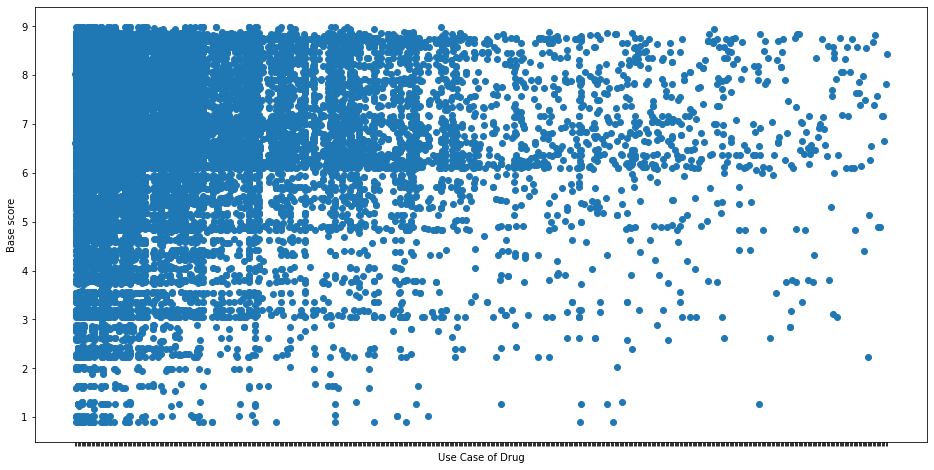

In [12]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.use_case_for_drug,data_train.base_score)
ax.set_xlabel('Use Case of Drug')
ax.set_ylabel('Base score')
ax.set_xticklabels([])
plt.show()

## Review by Patient

The sentiment of the words used in the reviews will be correlated with the score of the drug. To encode this, we will use a word embedding vector constructed from the spacy library. We will do this in data cleaning.

## Effectiveness Rating and Number of Times Prescribed

Both these categories are ordinal variables and the easiest to deal with. We expect them to have good correlations with the score. We will normalize them at the time of use to make it easier.  

Text(0, 0.5, 'Effectiveness Rating')

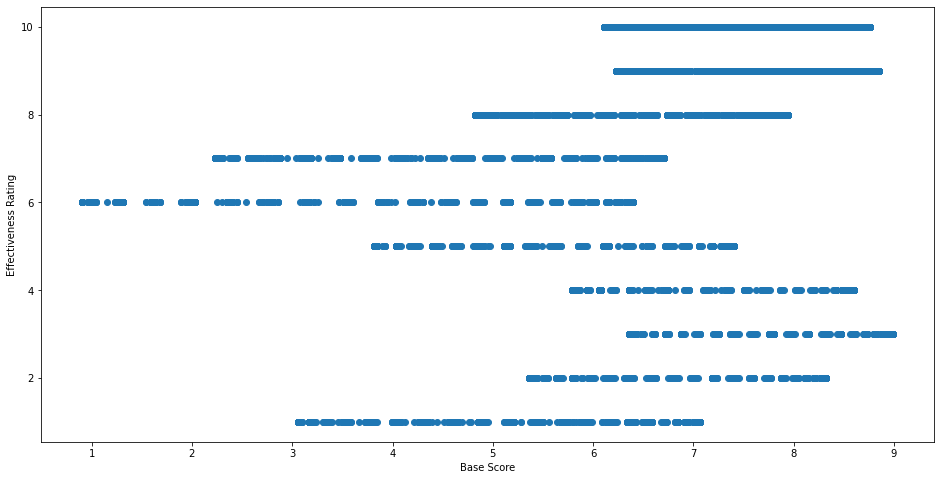

In [13]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.base_score,data_train.effectiveness_rating)
ax.set_xlabel('Base Score')
ax.set_ylabel('Effectiveness Rating')

A superficial glance tells us that the drugs with effectiveness rating of 10 are typically scored above 6. This is surprisingly true for drugs rated low on effectiveness as well, while the lowest base scores tend to happen on drugs with a neutral effectiveness rating. This tends to suggest a polarizing effect.

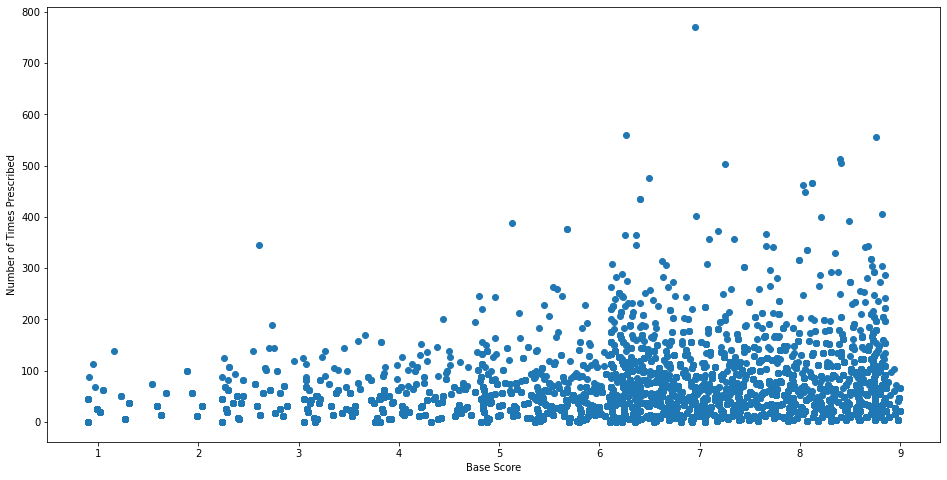

In [14]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.base_score,data_train.number_of_times_prescribed)
ax.set_xlabel('Base Score')
ax.set_ylabel('Number of Times Prescribed')
plt.show()

This tends to imply that lengthy prescriptions lead to a higher base score, but with the lack of data in the lower ranges we cannot completely tell by intuition.

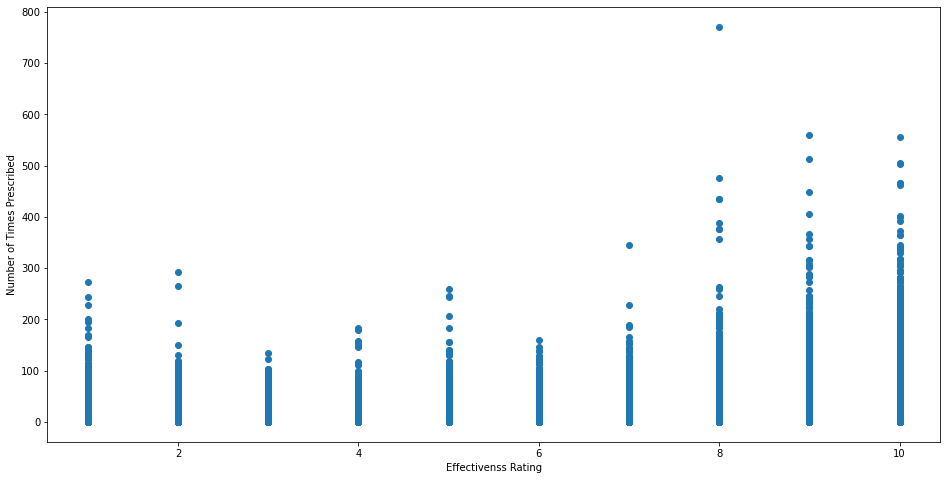

In [15]:
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(data_train.effectiveness_rating,data_train.number_of_times_prescribed)
ax.set_xlabel('Effectivenss Rating')
ax.set_ylabel('Number of Times Prescribed')
plt.show()

Finally, we can see that drugs with a higher effectiveness rating are typically prescribed for higher number of times.

## Drug Approved by UIC

This is a date category, so will convert it to a numerical value representing the days since the minimum value or first epoch. This will be done in data preparation.

# Data Preparation
### Data Cleaning

I have to use the above columns as features for the Machine Learning model. For this, all of the data needs to be converted into labels and appropriately normalized. I will do this step-by-step for each column. But first, I will perform some data cleaning operations on this database. I will search the data for:

1. Outliers which skew the data.
2. Null entries
3. Duplicate entries

/home/vroomvroom/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='base_score'>

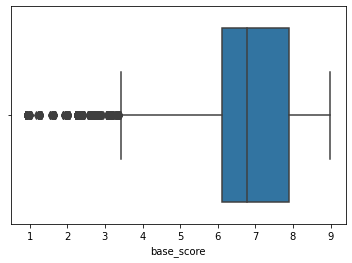

In [16]:
#Outliers

sns.boxplot(data_train.base_score)

There are seemingly some outliers in the base score compared to the average rating and the first percentile but given its apparent frequency I will not drop them from the database. 

In [17]:
#Null entries

data_train.isnull().values.any()

False

In [18]:
data_test.isnull().values.any()

False

In [19]:
#Duplicated values

duplicate = data_train[data_train.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [patient_id, name_of_drug, use_case_for_drug, review_by_patient, effectiveness_rating, drug_approved_by_UIC, number_of_times_prescribed, base_score]
Index: []


In [20]:
duplicate = data_test[data_test.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [patient_id, name_of_drug, review_by_patient, drug_approved_by_UIC, number_of_times_prescribed, use_case_for_drug, effectiveness_rating]
Index: []


The data is quite clean. No null values and no duplicates!


# Labeling the Data

We want to convert all the data values into various numerical labels, which can be fed to the ML model.

In [21]:
'''
def labelencode(data):
    le = ppr.LabelEncoder()
    cols=['patient_id', 'name_of_drug', 'use_case_for_drug','drug_approved_by_UIC']
    for i in cols:
        data[i]=le.fit_transform(data[i])
    return data
'''

# Drop the Patient ID

data_train=data_train.drop(columns="patient_id")
data_test=data_test.drop(columns="patient_id")

In [22]:
data_train.head()


,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [23]:
#reordering the columns in data test

columns_titles = ["name_of_drug", "use_case_for_drug","review_by_patient","effectiveness_rating","drug_approved_by_UIC","number_of_times_prescribed","base_score"]
data_test=data_test.reindex(columns=columns_titles)
data_test.head()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22,NaN
1,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35,NaN
2,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,3-Jul-14,13,NaN
3,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,18-Oct-16,21,NaN
4,Ambien,Insomnia,"""Ditto on rebound sleepless when discontinued....",2,13-Jan-15,44,NaN


To be able to label our data uniformly, we create a parent dataset which is the merger of the train and test sets. We will split them at the time of training.

In [24]:
#parent dataset

data_parent = data_train.append(data_test)
data_parent.set_axis(np.arange(0,train_rows+test_rows),axis='index',inplace=True)
print(data_parent.shape)

(42925, 7)


In [25]:
data_parent.tail()

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
42920,Chantix,Smoking Cessation,"""I took chantix a little over a month. It made...",1,11-Nov-17,2,NaN
42921,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1,30-Sep-14,18,NaN
42922,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43,NaN
42923,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7,NaN
42924,Arthrotec,Sciatica,"""It works!!!""",9,13-Sep-09,46,NaN


In [26]:
#One Hot Encoding Name of Drug

name_of_drug_one_hot = pd.get_dummies(data_parent.name_of_drug,prefix='Drug')

In [27]:
#One Hot Encoding Use Case of Drug

use_case_drug_one_hot = pd.get_dummies(data_parent.use_case_for_drug,prefix='Use')

When handling the reviews, we process it through NLP library SpaCy. We use the formulation of word embeddings or word vectors, so that similar reviews and words have similar vectors and hence affect the base score similarly while training.

In [28]:
#Patient Reviews

#Cleaning the reviews

nlp=spacy.load('en_core_web_lg')

In [29]:
def language_process(rows,data):
    index_of_review = np.arange(0,rows)
#index_of_review = np.arange(0,10)
    for i in index_of_review:
        doc_reviews=nlp(data.review_by_patient[i])
    #for token in doc_reviews:
    #    print(token)
        doc_reviews=' '.join([token.lemma_ for token in doc_reviews if not token.is_punct | token.is_oov | token.is_space | token.is_stop | token.is_currency | token.like_num])
        data.review_by_patient[i]=doc_reviews
    return data.review_by_patient


The Language Process function breaks the reviews down into lemmatic words and filters all the stopwords (a, an, the, in etc), punctuation, numbers and out of vocabulary objects.

In [30]:
rows=train_rows+test_rows
data_parent.review_by_patient=language_process(rows,data_parent)


/tmp/ipykernel_4067/2940430979.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review_by_patient[i]=doc_reviews


In [31]:
#drug approval date

data_parent.drug_approved_by_UIC=pd.to_datetime(data_parent['drug_approved_by_UIC'])
base_date=data_parent.drug_approved_by_UIC.min()
data_parent['time'] = (data_parent['drug_approved_by_UIC'] - base_date).dt.days
data_parent.drop(columns='drug_approved_by_UIC')

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,base_score,time
0,Valsartan,Left Ventricular Dysfunction,effect combination Mg Fish oil,9,27,8.022969,1547
1,Guanfacine,ADHD,son halfway week Intuniv concerned begin week ...,8,192,7.858458,793
2,Lybrel,Birth Control,oral contraceptive pill cycle light period max...,5,17,6.341969,659
3,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turn life feel healthy exc...,9,37,6.590176,3199
4,Cialis,Benign Prostatic Hyperplasia,day mg start work rock hard erection experianc...,2,43,6.144782,2834
...,...,...,...,...,...,...,...
42920,Chantix,Smoking Cessation,take chantix little month psychotic split medi...,1,2,NaN,3548
42921,Armodafinil,Narcolepsy,medicine keep sleep day body start shut eye cl...,1,18,NaN,2410
42922,Tamoxifen,"Breast Cancer, Prevention",take Tamoxifen year effect severe sweating dep...,10,43,NaN,2393
42923,Levonorgestrel,Birth Control,marry year old kid take pill hassle decide Mir...,8,7,NaN,995


All the reviews have not been split into "essential" components which will be better correlated with the base score.

In [32]:
cols=data_parent.columns.to_list
cols
cols = ['name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating','time', 'number_of_times_prescribed', 'base_score']

data_parent=data_parent[cols]

In [33]:
data_parent.head(20)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,time,number_of_times_prescribed,base_score
0,Valsartan,Left Ventricular Dysfunction,effect combination Mg Fish oil,9,1547,27,8.022969
1,Guanfacine,ADHD,son halfway week Intuniv concerned begin week ...,8,793,192,7.858458
2,Lybrel,Birth Control,oral contraceptive pill cycle light period max...,5,659,17,6.341969
3,Buprenorphine / naloxone,Opiate Dependence,Suboxone completely turn life feel healthy exc...,9,3199,37,6.590176
4,Cialis,Benign Prostatic Hyperplasia,day mg start work rock hard erection experianc...,2,2834,43,6.144782
5,Ethinyl estradiol / levonorgestrel,Birth Control,pill year doctor change rx effective help comp...,8,3210,1,5.691792
6,L-methylfolate,Depression,take anti depressant year improvement moderate...,10,3301,54,8.563274
7,Amitriptyline,ibromyalgia,take amitriptyline January diagnose fibromyalg...,9,3307,39,7.301039
8,Lamotrigine,Bipolar Disorde,medicine sun manage hypomania mania day start ...,10,2450,18,6.633970
9,Atripla,HIV Infection,Spring hospitalize pnuemonia diagnose Lyme die...,8,866,11,6.562116


In [34]:
#conversion of reviews to word vectors

with nlp.disable_pipes():
    doc_vectors = np.array([nlp(text).vector for text in data_parent.review_by_patient])


In [35]:
print(doc_vectors)
print(doc_vectors.shape)

[[-3.3924800e-01  1.8160197e-01  1.6035721e-01 ... -3.8561001e-01
  -7.7602200e-02  3.5711199e-02]
 [-6.5159932e-02  2.5600922e-01 -1.9288611e-01 ... -1.0057995e-02
  -1.7640037e-02 -2.2140469e-02]
 [-6.3698128e-02  2.0789297e-01 -3.4763660e-02 ...  3.0515838e-02
   2.5565272e-02 -5.7702553e-03]
 ...
 [-1.0727588e-01  2.9720846e-01 -1.3983071e-01 ...  6.3530765e-02
   3.7541837e-02 -1.5262571e-02]
 [-2.1833848e-02  1.5990171e-01 -1.3770628e-01 ...  2.0179655e-02
   1.2032803e-01 -1.4056082e-02]
 [-3.0251000e-05  8.4472999e-02 -1.2864999e-01 ...  7.7290997e-02
  -3.7827000e-01  2.7388000e-01]]
(42925, 300)


In [36]:
#preparing training data

#structure of training data:

#name_of_drug, use_case_of_drug, effectiveness_rating, drug_approved, number_of_times prescribed, doc_vectors
parent_data = pd.concat([data_parent, name_of_drug_one_hot, use_case_drug_one_hot], axis=1)
parent_data.shape


(42925, 3058)

In [37]:
parent_data=parent_data.drop(columns=['review_by_patient','base_score'])

In [38]:
col_str=[""]*300
for i in np.arange(0,300):
    col_str[i]='vec'+str(i)


word_database = pd.DataFrame(data = doc_vectors, 
                  index = np.arange(0,rows), 
                  columns = col_str)

In [39]:
parent_data=pd.concat([parent_data,word_database],axis=1)

In [40]:
parent_data=parent_data.drop(columns=['name_of_drug','use_case_for_drug'])

In [41]:
#final parent dataset

parent_data

,effectiveness_rating,time,number_of_times_prescribed,Drug_Abacavir / dolutegravir / lamivudine,Drug_Abatacept,Drug_Abilify,Drug_Abilify Discmelt,Drug_Abiraterone,Drug_AbobotulinumtoxinA,Drug_Abraxane,...,vec290,vec291,vec292,vec293,vec294,vec295,vec296,vec297,vec298,vec299
0,9,1547,27,0,0,0,0,0,0,0,...,-0.142184,-0.099064,-0.040768,-0.116144,-0.159742,0.322515,0.036018,-0.385610,-0.077602,0.035711
1,8,793,192,0,0,0,0,0,0,0,...,-0.001456,-0.006709,0.031527,0.006416,0.142440,0.034465,0.023179,-0.010058,-0.017640,-0.022140
2,5,659,17,0,0,0,0,0,0,0,...,-0.002306,0.113107,0.039335,-0.075344,0.046791,-0.010978,-0.156432,0.030516,0.025565,-0.005770
3,9,3199,37,0,0,0,0,0,0,0,...,-0.127076,0.014795,-0.114399,0.080963,0.112737,0.069010,-0.016962,0.055163,-0.083712,0.134270
4,2,2834,43,0,0,0,0,0,0,0,...,0.099048,-0.014975,0.046898,-0.177704,0.078590,0.059713,0.094826,0.006283,0.006226,-0.051147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42920,1,3548,2,0,0,0,0,0,0,0,...,-0.107003,-0.004676,-0.124908,0.077250,-0.060957,-0.042109,0.012081,-0.145806,0.044206,0.062079
42921,1,2410,18,0,0,0,0,0,0,0,...,0.047116,0.009233,-0.013468,-0.134337,0.023065,-0.004868,-0.127973,0.121789,-0.036197,-0.012719
42922,10,2393,43,0,0,0,0,0,0,0,...,0.177326,-0.083689,0.030932,-0.083134,-0.000208,0.055371,-0.057996,0.063531,0.037542,-0.015263
42923,8,995,7,0,0,0,0,0,0,0,...,0.025916,0.040884,-0.058606,-0.124003,0.122358,0.005594,-0.119049,0.020180,0.120328,-0.014056


# Modeling

In [42]:
#building the train and test datasets

train_data=parent_data.iloc[:train_rows,:]
test_data=parent_data.iloc[train_rows:,:]
train_target=data_train['base_score']

In [43]:
test_data.set_axis(np.arange(0,test_rows),axis='index',inplace=True)

We use a three layer neural network and split the parent dataset back into the training and test datasets. 

In [44]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [45]:
#partial training to check the model

x_val = train_data[:5000]
partial_x_train = train_data[5000:]
y_val = train_target[:5000]
partial_y_train = train_target[5000:]

In [46]:
model=build_model()
model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))

2021-11-29 03:32:30.204862: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-11-29 03:32:30.206560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-29 03:32:30.207227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-29 03:32:30.207552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-29 03:32:30.207761: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

Epoch 1/30
54/54 [==============================] - 3s 31ms/step - loss: 111.8716 - mae: 6.2949 - val_loss: 98.9811 - val_mae: 9.5596
Epoch 2/30
54/54 [==============================] - 1s 17ms/step - loss: 57.4167 - mae: 6.7230 - val_loss: 65.7066 - val_mae: 7.7046
Epoch 3/30
54/54 [==============================] - 1s 23ms/step - loss: 38.7202 - mae: 5.5894 - val_loss: 9.0982 - val_mae: 2.6626
Epoch 4/30
54/54 [==============================] - 1s 22ms/step - loss: 27.1992 - mae: 4.3839 - val_loss: 15.3883 - val_mae: 3.5950
Epoch 5/30
54/54 [==============================] - 1s 20ms/step - loss: 20.7164 - mae: 3.9464 - val_loss: 19.2161 - val_mae: 4.0527
Epoch 6/30
54/54 [==============================] - 1s 16ms/step - loss: 14.3308 - mae: 3.2900 - val_loss: 20.8343 - val_mae: 4.2245
Epoch 7/30
54/54 [==============================] - 1s 16ms/step - loss: 12.8403 - mae: 3.0021 - val_loss: 15.4257 - val_mae: 3.6110
Epoch 8/30
54/54 [==============================] - 1s 15ms/step - lo

In [47]:
val_mse, val_mae = model.evaluate(x_val, y_val)

157/157 [==============================] - 0s 3ms/step - loss: 3.8535 - mae: 1.6531


In [48]:
model_f=build_model()
model_f.fit(train_data, train_target, epochs=250, batch_size=512)

2021-11-29 03:33:07.739564: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 863051280 exceeds 10% of free system memory.


Epoch 1/250
63/63 [==============================] - 1s 14ms/step - loss: 127.4539 - mae: 8.6770
Epoch 2/250
63/63 [==============================] - 1s 15ms/step - loss: 67.0274 - mae: 7.3484
Epoch 3/250
63/63 [==============================] - 1s 16ms/step - loss: 45.2582 - mae: 5.9760
Epoch 4/250
63/63 [==============================] - 1s 16ms/step - loss: 26.5502 - mae: 4.4950
Epoch 5/250
63/63 [==============================] - 1s 16ms/step - loss: 19.0819 - mae: 3.8249
Epoch 6/250
63/63 [==============================] - 1s 14ms/step - loss: 13.1538 - mae: 3.1172
Epoch 7/250
63/63 [==============================] - 1s 18ms/step - loss: 11.0056 - mae: 2.7045
Epoch 8/250
63/63 [==============================] - 1s 14ms/step - loss: 7.4363 - mae: 2.2600
Epoch 9/250
63/63 [==============================] - 1s 18ms/step - loss: 5.7813 - mae: 1.9560
Epoch 10/250
63/63 [==============================] - 1s 16ms/step - loss: 4.9092 - mae: 1.7767
Epoch 11/250
63/63 [=====================

In [51]:
predictions=model_f.predict(test_data)

# Final Submission

In [53]:
solution = pd.DataFrame(predictions,columns=['base_score'])

In [54]:
solution

,base_score
0,7.140146
1,5.626563
2,6.404190
3,4.632690
4,5.609704
...,...
10755,4.627515
10756,5.708576
10757,6.347305
10758,5.515167


In [55]:
solution=pd.concat([pd.read_csv("test.csv").patient_id,solution],axis=1)

In [56]:
solution

,patient_id,base_score
0,163740,7.140146
1,39293,5.626563
2,208087,6.404190
3,23295,4.632690
4,97013,5.609704
...,...,...
10755,151266,4.627515
10756,139347,5.708576
10757,159999,6.347305
10758,130945,5.515167


In [62]:
pd.read_csv("test.csv")

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2
...,...,...,...,...,...,...,...
10755,151266,Chantix,"""I took chantix a little over a month. It made...",11-Nov-17,2,Smoking Cessation,1
10756,139347,Armodafinil,"""This medicine kept me from sleeping the whole...",30-Sep-14,18,Narcolepsy,1
10757,159999,Tamoxifen,"""I have taken Tamoxifen for 5 years. Side effe...",13-Sep-14,43,"Breast Cancer, Prevention",10
10758,130945,Levonorgestrel,"""I&#039;m married, 34 years old and I have no ...",15-Nov-10,7,Birth Control,8


High effectiveness rating tends to be associated with a base score on the higher end, but the model suggests that this isn't always the case. As the base score depends on all the parameters of the dataset.

# Suggestions (if I have more time)


1. Refine the model. Add dropouts, weight regularizations, optimize batch size, epochs, number of layers.
2. Compare several models together including Linear Regressors, SVCs and so on.
3. Filter out even more unnecessary words in the NLP-evaluation of the reviews. I could also reduce them to a sentimentality rating and train that rating instead of the word vector.
4. Study the results of omitting each column while training.

#### Thank you for the opportunity and I look forward to potentially working with you!